In [1]:
#1.Data Collection########################
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  maps
import folium
from folium.plugins import MarkerCluster

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 80)

In [4]:
df  = pd.read_csv("master.csv")  # suicides
gps = pd.read_csv("concap.csv")   # world GPS

Merge the Datasets
1. Check 'df' for country names that do not match country names in 'gps'
2. Update the country name

In [5]:
# check df against gps
count = 0
for i in sorted(df.country.unique()):
    if len(gps.CountryName[gps.CountryName == i].values) == 0:
        print('MISSING in gps:  df: {}\t\tgps:{}'.format(i,gps.CountryName[gps.CountryName == i].values))
        count = count + 1
print('check complete:  {} missing'.format(count)) 

MISSING in gps:  df: Cabo Verde		gps:[]
MISSING in gps:  df: Republic of Korea		gps:[]
MISSING in gps:  df: Russian Federation		gps:[]
MISSING in gps:  df: Saint Vincent and Grenadines		gps:[]
check complete:  4 missing


In [6]:
#  update names in df to match the gps file
df.replace({'Cabo Verde':'Cape Verde','Republic of Korea':'South Korea','Russian Federation':'Russia','Saint Vincent and Grenadines':'Saint Vincent and the Grenadines'},inplace=True)

In [7]:
# 1.Re-check for NULLs
# check df against gps
count = 0
for i in sorted(df.country.unique()):
    if len(gps.CountryName[gps.CountryName == i].values) == 0:
        print('MISSING in gps:  df: {}\t\tgps:{}'.format(i,gps.CountryName[gps.CountryName == i].values))
        count = count + 1
print('check complete:  {} missing'.format(count))

check complete:  0 missing


 1.Combine the datasets keyed on country cames
 2.Drop columns that are not needed

In [8]:
df = df.join(gps.set_index('CountryName'), on='country')
df = df.drop(['HDI for year','country-year','CountryCode','CapitalName'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
 10  CapitalLatitude     27820 non-null  float64
 11  CapitalLongitude    27820 non-null  float64
 12  ContinentName       27820 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.8+ MB


2. Understanding the Data ###########################
2.1 Data in the Dataset
Top 10 most populous countries in the world

In [9]:
top10 = ['China','India','United States','Indonesia','Brazil','Pakistan','Nigeria','Bangladesh','Russia','Mexico']
in_set = df.country[df.country.str.contains('|'.join(top10))].unique().tolist()

print('Out of the top 10 most populous countries: \n{}\n\nonly the following {} are present:\n{}'.format(top10,len(in_set),in_set))


Out of the top 10 most populous countries: 
['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Pakistan', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico']

only the following 4 are present:
['Brazil', 'Mexico', 'Russia', 'United States']


In [10]:
#  dataset
print('\n\nDataset has', len(df['country'].unique()),'countries (out of 195) on' ,len(df['ContinentName'].unique()),'continents spanning' ,len(df['year'].unique()),'years.')




Dataset has 101 countries (out of 195) on 7 continents spanning 32 years.


In [11]:
# 2.3 Data Types
print(df.info())         #  dataset size and types
print('\nDATA SHAPES:  {}'.format(df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
 10  CapitalLatitude     27820 non-null  float64
 11  CapitalLongitude    27820 non-null  float64
 12  ContinentName       27820 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.8+ MB
None

DATA SHAPES:  (27820, 13)


2.4 Statistical Summary
Summarize descriptive statistics of the dataset for categorical and numeric attributes
2.4.1 Statistical Summary - CATEGORICAL DATA
Summarize the count, uniqueness and frequency of categorical features, excluding numeric values.

In [12]:
df.describe(include=['O'])   #  CATEGORICAL DATA

,country,sex,age,gdp_for_year ($),generation,ContinentName
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,6,7
top,Netherlands,female,55-74 years,"91,941,192,896",Generation X,Europe
freq,382,13910,4642,12,6408,12434


3. Data Cleaning#########################################
Data clean-up was completed in Data Collection section with renaming of the countries and dropping columns.

In [13]:
df.describe()   #  NUMERIC DATA

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($),CapitalLatitude,CapitalLongitude
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414,27.093787,3.500437
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472,26.775683,64.334711
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000,-41.300000,-99.133333
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000,12.133333,-59.616667
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000,37.550000,13.400000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000,48.200000,35.233333
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000,64.150000,178.416667


3. Data Cleaning
Data clean-up was completed in Data Collection section with renaming of the countries and dropping columns.

List of NULL rows
                    Total  Percent
ContinentName           0      0.0
CapitalLongitude        0      0.0
CapitalLatitude         0      0.0
generation              0      0.0
gdp_per_capita ($)      0      0.0
 gdp_for_year ($)       0      0.0
suicides/100k pop       0      0.0
population              0      0.0
suicides_no             0      0.0
age                     0      0.0
sex                     0      0.0
year                    0      0.0
country                 0      0.0

DUPLICATED rows:	0


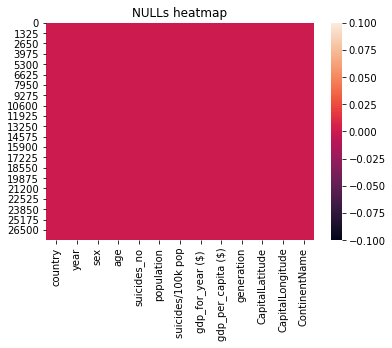

In [14]:
# This is a final re-check for NULL and duplicate values in the dataset.
nulls = df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(df)*100,2)
df.null = pd.concat([nulls, prcet], axis = 1,keys= ['Total', 'Percent'])

print('List of NULL rows\n{}'.format(df.null))
print('\nDUPLICATED rows:\t{}'.format(df.duplicated().sum()))

plt.title('NULLs heatmap')
sns.heatmap(df.isnull())
#Observation: There are no nulls or duplicates in the 'df' dataset.

4. Data Visualization
4.1 Suicide Rates per Country

,country,suicides/100k pop
0,Lithuania,40.415573
1,Sri Lanka,35.295152
2,Russia,34.892377
3,Hungary,32.761516
4,Belarus,31.075913
5,Kazakhstan,30.511282
6,Latvia,29.259325
7,Slovenia,27.827857
8,Estonia,27.276905
9,Ukraine,26.582321


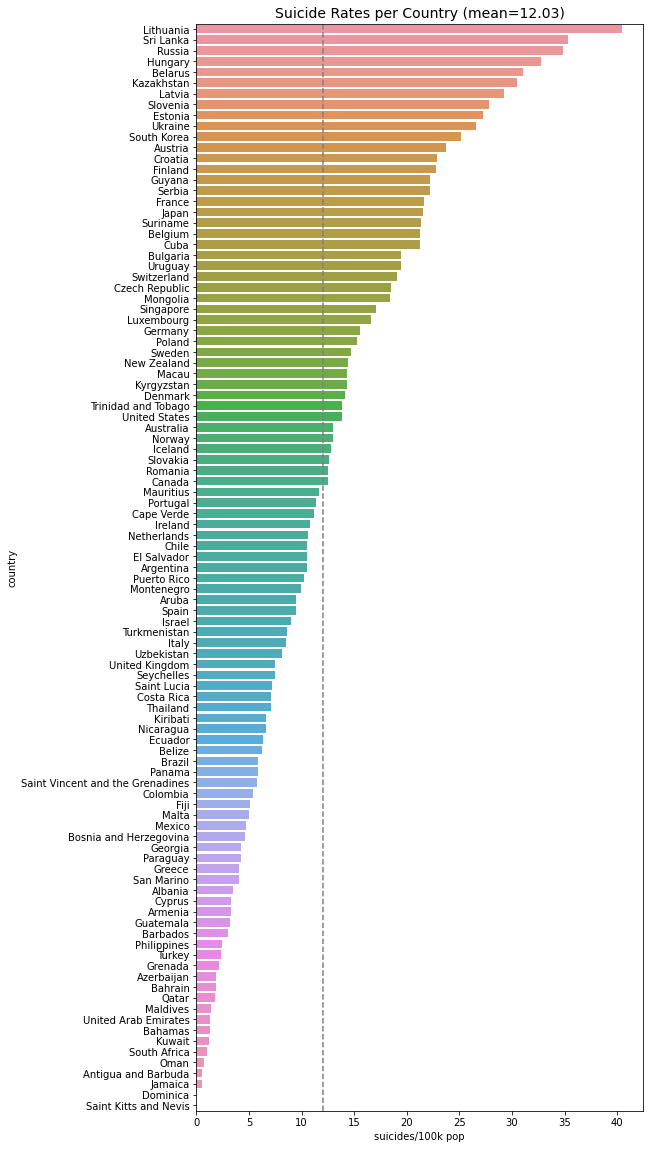

In [15]:
# Plot the average suicide rates per country and compare with the global mean.
suicideRate = df['suicides/100k pop'].groupby(df['country']).mean().sort_values(ascending=False).reset_index()
suicideMean = suicideRate['suicides/100k pop'].mean()

plt.figure(figsize=(8,20))
plt.title('Suicide Rates per Country (mean={:.2f})'.format(suicideMean), fontsize=14)
plt.axvline(x=suicideMean,color='gray',ls='--')
sns.barplot(data=suicideRate, y='country',x='suicides/100k pop')

suicideRate.head(10)

# OBSERVATIONS
# Lithuania, Sri Lanka and Russia top the list with suicide rates much higher than the global mean of 12.

4.2 Population and GDP over Time

In [16]:
YRS = sorted(df.year.unique()-1)  # not including 2016 data
POP = []    # population
GDC = []    # gdp_per_capita ($)
SUI = []    # suicides_no
SUR = []    # suicides/100k pop

In [17]:
for year in sorted(YRS):
    POP.append(df[df['year']==year]['population'].sum())
    GDC.append(df[df['year']==year]['gdp_per_capita ($)'].sum())
    SUI.append(df[df['year']==year]['suicides_no'].sum())
    SUR.append(df[df['year']==year]['suicides/100k pop'].sum())

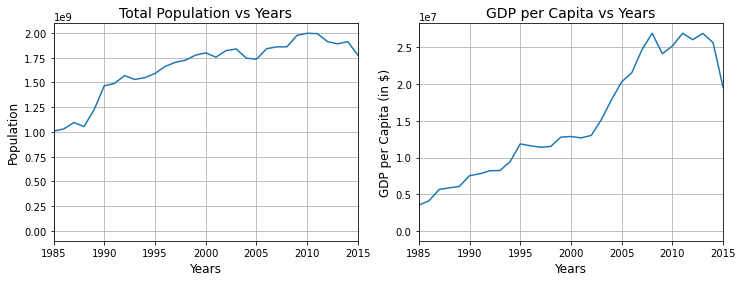

In [18]:
#  plot population and gdp_per_capita ($), 1985-2015
fig = plt.figure(figsize=(12,4))
fig.add_subplot(121)
plt.title('Total Population vs Years', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.axis('auto')
plt.xlim(1985,2015)
plt.grid();plt.plot(YRS,POP)
fig.add_subplot(122)
plt.title('GDP per Capita vs Years', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('GDP per Capita (in $)', fontsize=12)
plt.xlim(1985,2015)
plt.grid();plt.plot(YRS,GDC)
plt.show()

# OBSERVATIONS
# Population and GDP per Capita were steadily increasing from 1985 to 2008, then leveling off and markedly declining after 2014.


4.3 Suicides and Suicide Rates over Time

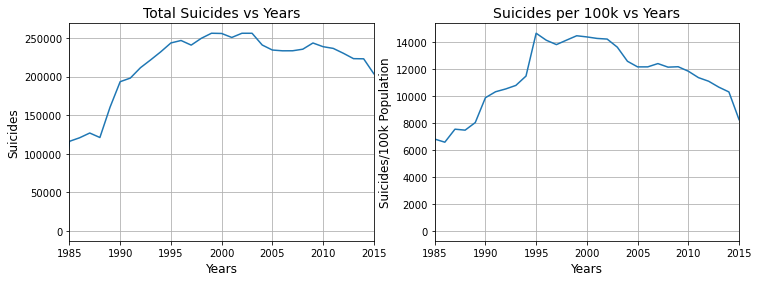

In [19]:
#  plot suicides_no and suicides/100k pop, 1985-2015
fig = plt.figure(figsize=(12,4))
fig.add_subplot(121)
plt.title('Total Suicides vs Years', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Suicides', fontsize=12)
plt.xlim(1985,2015)
plt.grid();plt.plot(YRS,SUI)
fig.add_subplot(122)
plt.title('Suicides per 100k vs Years', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Suicides/100k Population', fontsize=12)
plt.xlim(1985,2015)
plt.grid();plt.plot(YRS,SUR)
plt.show()


# OBSERVATIONS
# Total number of suicides have been leveling off since the mid-90s, but more importantly, the rate of suicides has been declining since the mid-90s. It is still difficult to correlate any information between populations, GDP and suicide rates


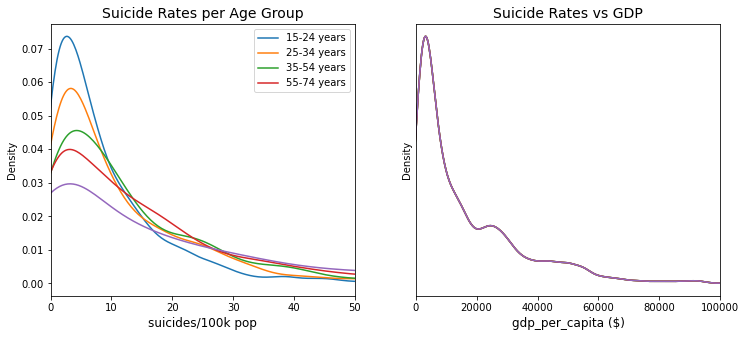

In [20]:
# 4.4 Suicide Rates per Age Groups and GDP
ageList = sorted(df.age.unique())
ageList.remove('5-14 years')
fig = plt.figure(figsize=(12,5))

for i in ageList:
    fig.add_subplot(121)
    plt.title('Suicide Rates per Age Group', fontsize=14)
    plt.xlabel('suicides/100k pop', fontsize=12)
    plt.xlim(0,50)
    plt.legend(ageList)
    df['suicides/100k pop'][df['age'] == i].plot(kind='kde')

    fig.add_subplot(122)
    plt.title('Suicide Rates vs GDP', fontsize=14)
    plt.xlabel('gdp_per_capita ($)', fontsize=12)
    plt.yticks([], [])
    plt.xlim(0,100000)
    #df['gdp_per_capita ($)'][df['age'] == i].plot(kind='kde')
    df['gdp_per_capita ($)'].plot(kind='kde')

OBSERVATIONS
GDP per capita has an inverse effect on the rate of suicides; lower the GDP per Capita, higher the rate of suicides. Rate of people 75+ yrs. are far more likely to commit suicide, and is significantly higher in countries with a lower GDP.


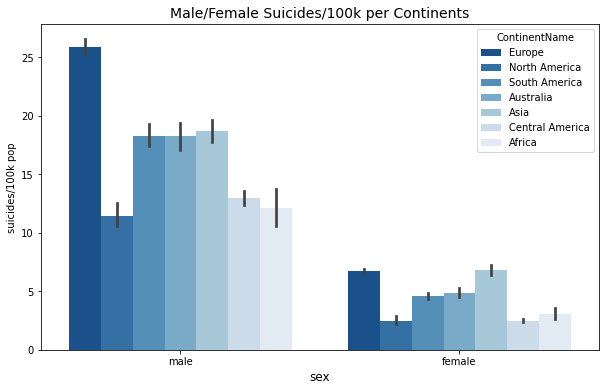

In [21]:
# 4.5 Male & Female Suicide Rates per Continents
fig = plt.figure(figsize=(10,6))
plt.title('Male/Female Suicides/100k per Continents', fontsize=14)
plt.xlabel('Generation', fontsize=12)
sns.barplot(data =df, x='sex',y='suicides/100k pop', hue='ContinentName',palette='Blues_r')

OBSERVATIONS
 Europeans have a higher rate of suicides than any other continents, and males are four times more likely to commit suicides then females.

We cannot assume that this is actually true since this dataset contains only 101 out of 245 countries.


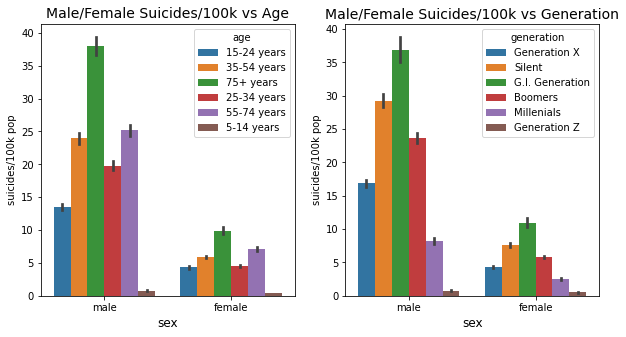

In [22]:
# 4.6 Male & Female Suicide Rates per Age Groups
# Age and Generation attributes ranges are very similar

fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.title('Male/Female Suicides/100k vs Age', fontsize=14)
plt.xlabel('sex', fontsize=12)
sns.barplot(data=df, x='sex',y='suicides/100k pop', hue='age')
fig.add_subplot(122)
plt.title('Male/Female Suicides/100k vs Generation', fontsize=14)
plt.xlabel('Generation', fontsize=12)
sns.barplot(data=df, x='sex',y='suicides/100k pop', hue='generation')
plt.show()

OBSERVATIONS

Males are almost four times more likely to commit suicide then females. Both males and females over 55 years are more susceptible then other age groups.

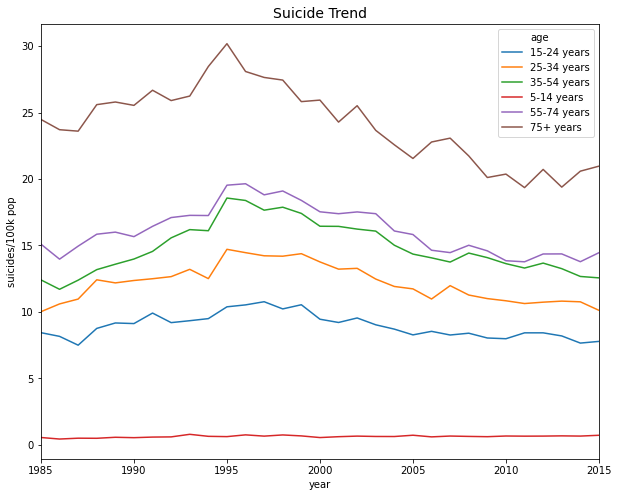

In [23]:
# 4.7 Suicide Trends over Time - Age Groups
df_sort =  df.sort_values(by='age')  # sort by age
plt.figure(figsize=(10,8))
plt.title('Suicide Trend', fontsize=14)
plt.xlim(1985,2015)     # disregarding 2016
sns.lineplot(data=df_sort,x='year',y='suicides/100k pop',hue='age',ci=None)


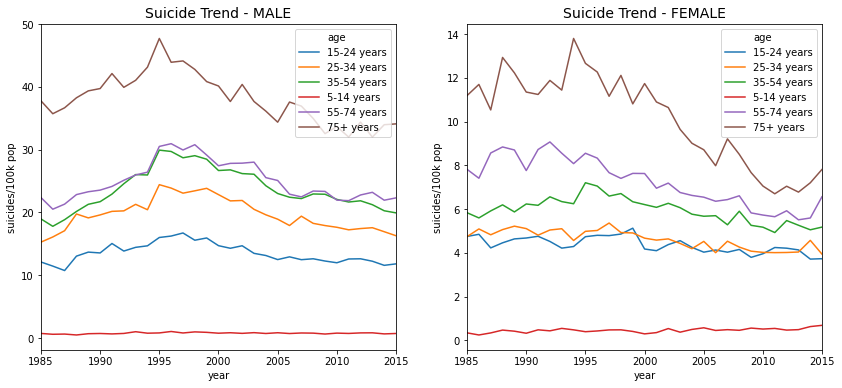

In [24]:
# 4.8 Suicide Trends over Time - Male/Female
fig = plt.figure(figsize=(14,6))
fig.add_subplot(121)
plt.title('Suicide Trend - MALE', fontsize=14)
plt.xlim(1985,2015)     # disregarding 2016
sns.lineplot(data=df_sort[df_sort['sex'] == 'male'], x='year',y='suicides/100k pop',hue='age',ci=None)
fig.add_subplot(122)
plt.title('Suicide Trend - FEMALE', fontsize=14)
plt.xlim(1985,2015)     # disregarding 2016
sns.lineplot(data=df_sort[df_sort['sex'] == 'female'], x='year',y='suicides/100k pop',hue='age',ci=None)
plt.show()

 OBSERVATIONS

 Rate of suicides have been declining for both males and females, however, there has been a significant uptick in rates of females in age groups 55+ in recent years.


5 Correlations
Correlation is a statistical metric for measuring to what extent different variables are interdependent. In the analysis, we will look at the overall correlation, as well as the correlations based on male/female.

In order to perform correlation, we need to first take care of two very important processes:

Encoding categorical attributes with numerical values
Normalization of the data

Encoding
Machine learning algorithms cannot process categorical or text data unless they have been converted to numbers. Encoding maps categorical values to integer values, which are represented as a binary vector that are all zero values, except the index of the integer, which is set to 1.

Categorical attributes will be manually encoded with numeric values. The steps involved are:

1.drop columns not needed for correlation
2.rearrange column names
3.encode


In [25]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation', 'CapitalLatitude', 'CapitalLongitude', 'ContinentName'],
      dtype='object')

In [26]:
#  1.  drop columns not needed for correlation
df_corr = df.drop(['country','year','CapitalLatitude','CapitalLongitude'], axis=1)

#  2.  rearrange column names
df_corr = df_corr[['suicides/100k pop', 'sex', 'age', 'population',' gdp_for_year ($) ','gdp_per_capita ($)', 'generation','suicides_no','ContinentName']]

#  3.  encode
df_corr['sex'] = df_corr['sex'].map({'female':0,'male':1})
df_corr['age'] = df_corr['age'].map({
        '5-14 years':0,'15-24 years':1,'25-34 years':2,
        '35-54 years':3,'55-74 years':4,'75+ years':5})
df_corr['generation'] = df_corr['generation'].map({
        'Generation Z':0,'Millenials':1,'Generation X':2,
        'Boomers':3,'Silent':4,'G.I. Generation':5})
df_corr['ContinentName'] = df_corr['ContinentName'].map({
        'Africa':0,'Asia':1,'Australia':2,'Central America':3,
        'Europe':4,'North America':5,'South America':6})

#  remove commas and save as float64
df_corr[' gdp_for_year ($) '] = df_corr[' gdp_for_year ($) '].str.replace(',','').astype('float64')

#df_corr.describe(include=['O'])   #  CATEGORICAL DATA
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   suicides/100k pop   27820 non-null  float64
 1   sex                 27820 non-null  int64  
 2   age                 27820 non-null  int64  
 3   population          27820 non-null  int64  
 4    gdp_for_year ($)   27820 non-null  float64
 5   gdp_per_capita ($)  27820 non-null  int64  
 6   generation          27820 non-null  int64  
 7   suicides_no         27820 non-null  int64  
 8   ContinentName       27820 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.9 MB


Normalization
Normalization is a rescaling of the data from the original range so that all values are within a certain range, typically between 0 and 1. Normalized data is essential in machine learning. Correlation and models will not produce good results if the scales are not standardized.

Data in df_corr will be normalized and the df data frame will be updated with the encoded and normalized data.

suicides/100k pop     1.000000
sex                   0.391496
age                   0.362587
generation            0.335593
suicides_no           0.306604
 gdp_for_year ($)     0.025240
ContinentName         0.013312
population            0.008285
gdp_per_capita ($)    0.001785
Name: suicides/100k pop, dtype: float64

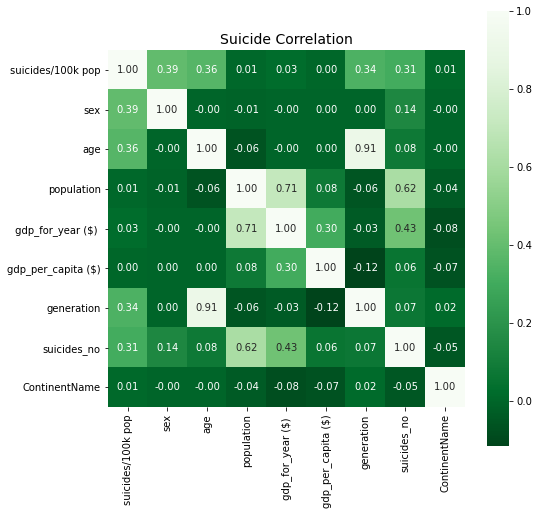

In [27]:
# 5.2 Overall Correlation
dataCorr = df_corr.corr()
plt.figure(figsize=(8,8))
plt.title('Suicide Correlation', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'Greens_r')

dataCorr['suicides/100k pop'].sort_values(ascending=False)

OBSERVATIONS 

As noted in the plots, age/generation and sex are significant factors in determining suicide rates.

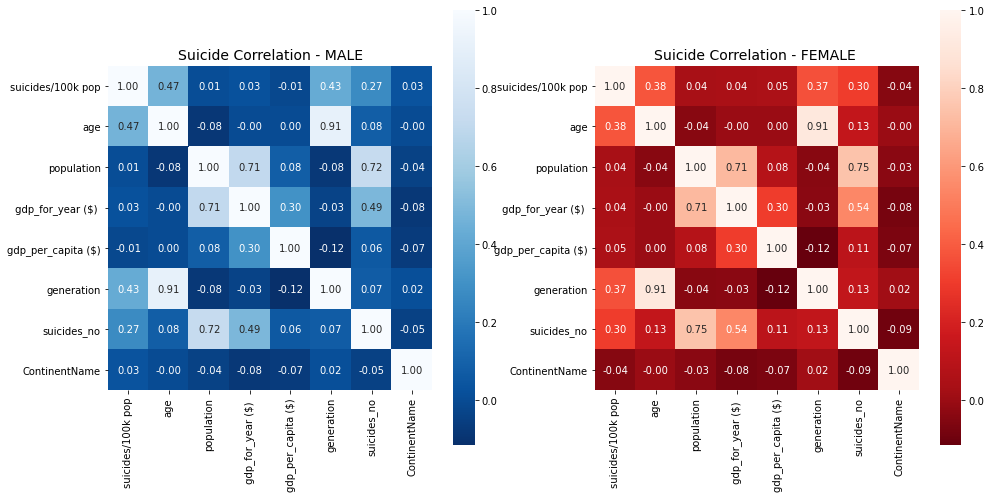

In [28]:
# 5.3 Correlation - Male & Female

#  Correlation MALE - filter dataframe for male/female
dataMale   = df_corr[(df_corr['sex'] == 1)]                       # male
dataMaleCorr = dataMale.drop(["sex"], axis=1).corr()        # male corr
corrM = dataMaleCorr['suicides/100k pop'].sort_values(ascending=False)

#  Correlation FEMALE - filter dataframe for male/female
dataFemale = df_corr[(df_corr['sex'] == 0)]                       # female
dataFemaleCorr = dataFemale.drop(["sex"], axis=1).corr()    # female corr
corrF = dataFemaleCorr['suicides/100k pop'].sort_values(ascending=False)

#  Correlation heatmaps for FEMALE/MALE
fig = plt.figure(figsize=(16,8))
fig.add_subplot(121)
plt.title('Suicide Correlation - MALE', fontsize=14)
sns.heatmap(dataMaleCorr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r')
fig.add_subplot(122)
plt.title('Suicide Correlation - FEMALE ', fontsize=14)
sns.heatmap(dataFemaleCorr, annot=True, fmt='.2f', square=True, cmap = 'Reds_r')
plt.show()

OBSERVATIONS 

Age/generation are significant factors for both males and females in determining suicide rates


6 Choropleth and Folium Maps

Choropleth Map

Choropleth map showing the suicide rates of the countries in the dataset.

In [29]:
df_choro = df[['suicides/100k pop','country']].groupby(['country']).mean().sort_values(by='suicides/100k pop').reset_index()

#  Update US name to match JSON file
df_choro.replace({'United States':'United States of America'},inplace=True)


world_geo = r'world-countries.json'
world_choropelth = folium.Map(location=[0, 0], tiles='cartodbpositron',zoom_start=1)

world_choropelth.choropleth(
    geo_data=world_geo,
    data=df_choro,
    columns=['country','suicides/100k pop'],
    key_on='feature.properties.name',
    fill_color='PuBu',  # YlGn
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Suicide Rates per 100k Population')

 
# display map
world_choropelth

In [30]:
# 6.2 Folium World Map
# Folium map showing the number of suicides per countries in the dataset.


#  create dataframe for mapping
mapdf = pd.DataFrame(columns =  ['country','suicides_no','lat','lon'])

mapdf.lat = mapdf.lat.astype(float).fillna(0.0)
mapdf.lon = mapdf.lat.astype(float).fillna(0.0)

mapdf['country']     = df['suicides_no'].groupby(df['country']).sum().index
mapdf['suicides_no'] = df['suicides_no'].groupby(df['country']).sum().values
for i in range(len(mapdf.country)):
    mapdf.lat[i] =  df.CapitalLatitude[(df['country'] == mapdf.country[i])].unique()
    mapdf.lon[i] = df.CapitalLongitude[(df['country'] == mapdf.country[i])].unique()


In [31]:
#  make map - popup displays country and suicide count
#  lat/lon must be "float"
world_map = folium.Map(location=[mapdf.lat.mean(),mapdf.lon.mean()],zoom_start=2)
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(mapdf)-1):
    label = '{}:  {} suicides'.format(mapdf.country[i].upper(),mapdf.suicides_no[i])
    label = folium.Popup(label, parse_html=True)
    folium.Marker(location=[mapdf.lat[i],mapdf.lon[i]],
            popup = label,
            icon = folium.Icon(color='green')
    ).add_to(marker_cluster)


world_map.add_child(marker_cluster)
world_map         #  display map